<a href="https://colab.research.google.com/github/sinclairjang/Pattern-recognition-learning-with-code/blob/master/polynomial_curve_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from fastai.basics import *
import numpy as np
import matplotlib.pyplot as plt

# Polynomial Curve Fitting

We can solve the curve fitting problem by choosing the value of $\textbf{w}$ for which $E(\textbf{w})$ is as small as possible.


\begin{align*}
  y(x,\textbf{w}) = w_0 + w_1x + w_2x^2 + ... + w_Mx^M = \sum_{j=0}^{M}w_jx^j
\end{align*}


\begin{align*}
  E(\textbf{w}) = \frac{1}{2}\sum_{n=1}^{N}\{y(x_n, \textbf{w})-t_n\}^2
\end{align*}

In [252]:
class PolyFit:
  def __init__(self, x, y, n):
    self.x = x
    self.y = y
    self.num_samples = n
  
  @classmethod  
  def data_gen(cls, noise:bool=True, num_samples=50):
    x = np.linspace(0, 1, num_samples)
    y = np.sin(2*np.pi*x)
    if noise: y += np.random.normal(scale=0.3, size=(10))
    return cls(x, y, num_samples)

  def __call__(self, deg):
    with warnings.catch_warnings():
      warnings.simplefilter('ignore', np.RankWarning)
      return np.poly1d(np.polyfit(self.x, self.y, deg))
  
  def rmse(self, pred):
    if isinstance(pred, List): return np.array([self.rmse(p) for p in pred])
    else: return np.sqrt(((self.y - pred)**2).mean())

In [253]:
poly_fit_no_noise = PolyFit.data_gen(noise=False)
poly_fit_train = PolyFit.data_gen(num_samples=10)
poly_fit_test = PolyFit.data_gen(num_samples=10)

In [254]:
p0 = poly_fit_train(0)
print(p0)

p1 = poly_fit_train(1)
print(p1)

p3 = poly_fit_train(3)
print(p3)

p9 = poly_fit_train(9)
#print(p9)

 
0.01706
 
-1.464 x + 0.749
       3        2
21.59 x - 33.6 x + 12.04 x - 0.1779


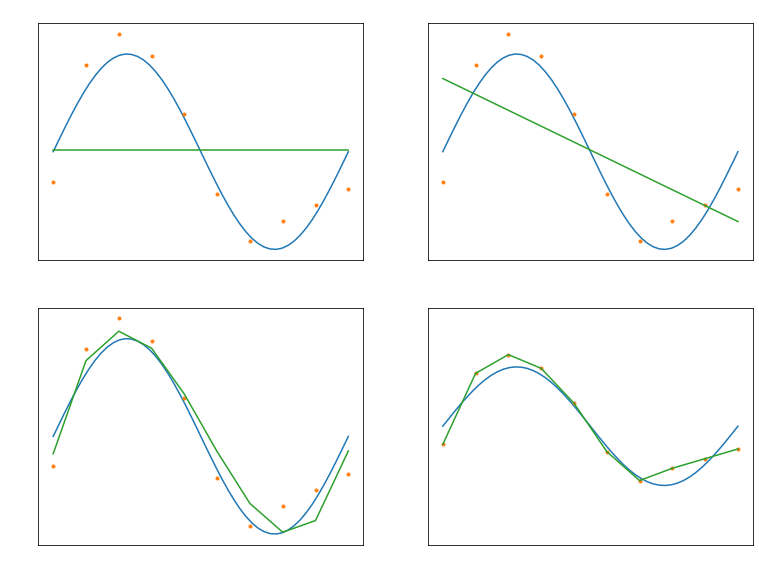

In [255]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [12.8, 9.6]
mpl.rcParams['axes.titlecolor'] = 'white'
mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'

fig, axes = plt.subplots(2, 2)

axes[0,0].plot(poly_fit_no_noise.x, poly_fit_no_noise.y, '-', 
               poly_fit_train.x, poly_fit_train.y, '.',
               poly_fit_train.x, p0(poly_fit_train.x), '-')
axes[0,0].set_title("M=0")

axes[0,1].plot(poly_fit_no_noise.x, poly_fit_no_noise.y, '-', 
               poly_fit_train.x, poly_fit_train.y, '.',
               poly_fit_train.x, p1(poly_fit_train.x), '-')
axes[0,1].set_title("M=1")

axes[1,0].plot(poly_fit_no_noise.x, poly_fit_no_noise.y, '-', 
               poly_fit_train.x, poly_fit_train.y, '.',
               poly_fit_train.x, p3(poly_fit_train.x), '-')
axes[1,0].set_title("M=3")

axes[1,1].plot(poly_fit_no_noise.x, poly_fit_no_noise.y, '-', 
               poly_fit_train.x, poly_fit_train.y, '.',
               poly_fit_train.x, p9(poly_fit_train.x), '-')
axes[1,1].set_title("M=9")
axes[1,1].set_ylim(-2,2)
plt.show()

In [256]:
train_err = poly_fit_train.rmse([poly_fit_train(i)(poly_fit_train.x) for i in range(10)])
print(type(train_err))
print(train_err)

test_err = poly_fit_test.rmse([poly_fit_train(i)(poly_fit_test.x) for i in range(10)])
print(type(test_err))
print(test_err)

<class 'numpy.ndarray'>
[7.361750e-01 5.689506e-01 5.583360e-01 2.021423e-01 1.070087e-01 5.765549e-02 5.759916e-02 2.759265e-02 5.715227e-05
 2.362227e-12]
<class 'numpy.ndarray'>
[0.606032 0.471525 0.455309 0.314609 0.372161 0.369518 0.369484 0.370237 0.360682 0.360687]


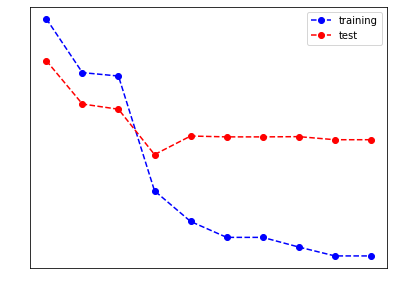

In [262]:
mpl.rcParams['figure.figsize'] = mpl.rcParamsDefault['figure.figsize']
plt.plot(np.arange(10), train_err, 'b--o')
plt.plot(np.arange(10), test_err, 'r--o')
plt.legend(['training', 'test'])
plt.show()